# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as own

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_keys = api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

In [4]:
print(f"---------------------------------")
print (f" Beginning Data Retrieval")
print (f"--------------------------------")

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {record} of Set {record} | {city}")
    
        record= record + 1    
      
    except:
        print("City not found. Skipping...")
    continue
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")


---------------------------------
 Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 2 | vaini
Processing Record 3 of Set 3 | tuktoyaktuk
Processing Record 4 of Set 4 | umm lajj
Processing Record 5 of Set 5 | zhoukou
City not found. Skipping...
Processing Record 6 of Set 6 | rikitea
Processing Record 7 of Set 7 | srednekolymsk
Processing Record 8 of Set 8 | georgetown
Processing Record 9 of Set 9 | guaruja
Processing Record 10 of Set 10 | kahului
City not found. Skipping...
Processing Record 11 of Set 11 | butaritari
Processing Record 12 of Set 12 | caravelas
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 14 | barrow
City not found. Skipping...
Processing Record 15 of Set 15 | puerto ayora
Processing Record 16 of Set 16 | souillac
Processing Record 17 of Set 17 | port lincoln
Processing Record 18 of Set 18 | new norfolk
Processing Record

Processing Record 177 of Set 177 | yar-sale
Processing Record 178 of Set 178 | khonsa
Processing Record 179 of Set 179 | kaitangata
Processing Record 180 of Set 180 | meulaboh
Processing Record 181 of Set 181 | cherskiy
Processing Record 182 of Set 182 | sibiti
Processing Record 183 of Set 183 | tasiilaq
Processing Record 184 of Set 184 | chara
Processing Record 185 of Set 185 | erdenet
Processing Record 186 of Set 186 | yurgamysh
Processing Record 187 of Set 187 | vila franca do campo
Processing Record 188 of Set 188 | komsomolskiy
Processing Record 189 of Set 189 | upernavik
Processing Record 190 of Set 190 | prado
Processing Record 191 of Set 191 | ahipara
Processing Record 192 of Set 192 | solnechnyy
Processing Record 193 of Set 193 | tomatlan
Processing Record 194 of Set 194 | kulhudhuffushi
Processing Record 195 of Set 195 | kuala sungai baru
Processing Record 196 of Set 196 | kodiak
City not found. Skipping...
Processing Record 197 of Set 197 | lazaro cardenas
Processing Record 

Processing Record 355 of Set 355 | velka bites
Processing Record 356 of Set 356 | obihiro
Processing Record 357 of Set 357 | almaznyy
City not found. Skipping...
Processing Record 358 of Set 358 | te anau
Processing Record 359 of Set 359 | charlestown
Processing Record 360 of Set 360 | sao joao da barra
Processing Record 361 of Set 361 | belmonte
Processing Record 362 of Set 362 | tabuk
Processing Record 363 of Set 363 | coquimbo
Processing Record 364 of Set 364 | leningradskiy
Processing Record 365 of Set 365 | takoradi
Processing Record 366 of Set 366 | pacific grove
Processing Record 367 of Set 367 | matara
Processing Record 368 of Set 368 | bandarbeyla
Processing Record 369 of Set 369 | humaita
Processing Record 370 of Set 370 | vizinga
Processing Record 371 of Set 371 | dothan
Processing Record 372 of Set 372 | faranah
Processing Record 373 of Set 373 | sao felix do xingu
Processing Record 374 of Set 374 | taltal
Processing Record 375 of Set 375 | luba
Processing Record 376 of Set

City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = { "City": city, "Cloudiness": cloudiness, 'Country': country, "Date": date, "Humidity": humidity, "Lat": lat,
                "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,samalaeulu,74,PF,1567623052,74,-9.80,-139.03,78.53,8.77
1,samalaeulu,100,IN,1567623052,94,15.34,74.49,75.29,4.43
2,samalaeulu,75,CA,1567623052,87,69.44,-133.03,48.20,4.70
3,samalaeulu,100,SA,1567623052,70,25.02,37.27,85.19,10.58
4,samalaeulu,10,CN,1567623052,90,33.63,114.64,67.73,4.52


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

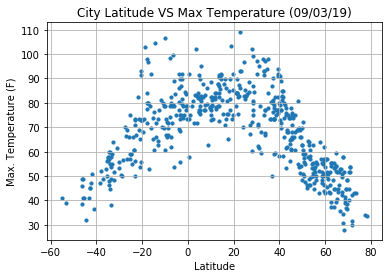

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = 'o', s=10)
plt.title("City Latitude VS Max Temperature (09/03/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/lT.png")


#### Latitude vs. Humidity Plot

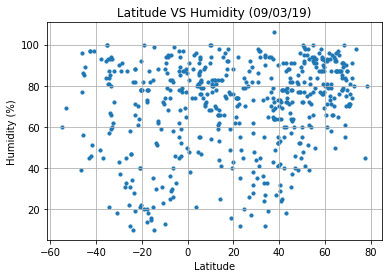

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = 'o', s=10)
plt.title("Latitude VS Humidity (09/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/lh.png")

#### Latitude vs. Cloudiness Plot

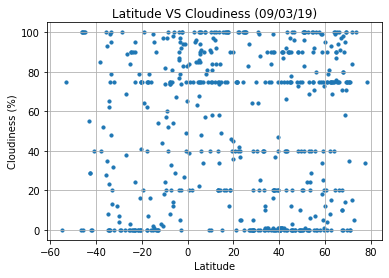

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = 'o', s=10)
plt.title("Latitude VS Cloudiness (09/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/lc.png")


#### Latitude vs. Wind Speed Plot

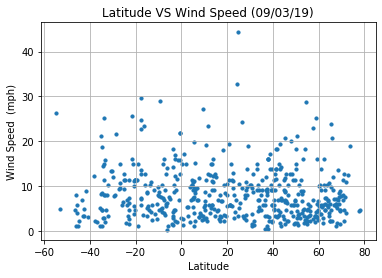

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = 'o', s=10)
plt.title("Latitude VS Wind Speed (09/03/19)")
plt.ylabel("Wind Speed  (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/lws.png")
plt.show()

# plt.savefig